In [2]:
import pandas as pd
path = 'csv_files/'

csvs = ['Jan2020','Feb2020','Mar2020','Apr2020','May2020','Jun2020',
       'Jul2020','Aug2020','Sep2020','Oct2020','Nov2020','Dec2020',
       'Jan2021','Feb2021','Mar2021','Apr2021','May2021','Jun2021',
       'Jul2021','Aug2021','Sep2021','Oct2021','Nov2021','Dec2021']
new_dict = {'login1' : {'wusers':[],'memory-used':[],'running-process':[],'cpu_usage %':[],'running-jobs':[]},
           'login2' : {'wusers':[],'memory-used':[],'running-process':[],'cpu_usage %':[],'running-jobs':[]},
           'login3' : {'wusers':[],'memory-used':[],'running-process':[],'cpu_usage %':[],'running-jobs':[]},
           'login4' : {'wusers':[],'memory-used':[],'running-process':[],'cpu_usage %':[],'running-jobs':[]},
           'login5' : {'wusers':[],'memory-used':[],'running-process':[],'cpu_usage %':[],'running-jobs':[]}
           }

for i in csvs:
    df  = pd.read_csv(path+i+'.csv',usecols=['date-hour','login-node','wusers','memory-used','running-process','cpu_usage %','running-jobs','df-usage'])
    new_df = df.sort_values(by=['login-node','date-hour'])
    month = new_df.iloc[-1][0][0:3]
    year = new_df.iloc[-1][0][5:10]
    end = int(new_df.iloc[-1][0][3:5])
    day_dict = {'login1' : {'wusers':[],'memory-used':[],'running-process':[],'cpu_usage %':[],'running-jobs':[]},
           'login2' : {'wusers':[],'memory-used':[],'running-process':[],'cpu_usage %':[],'running-jobs':[]},
           'login3' : {'wusers':[],'memory-used':[],'running-process':[],'cpu_usage %':[],'running-jobs':[]},
           'login4' : {'wusers':[],'memory-used':[],'running-process':[],'cpu_usage %':[],'running-jobs':[]},
           'login5' : {'wusers':[],'memory-used':[],'running-process':[],'cpu_usage %':[],'running-jobs':[]}}
    
    for j in range(1,end+1):
        if j <= 9:
            date = month+'0'+ str(j) + year
        else:
            date = month + str(j) + year
        
        abc = new_df[new_df['date-hour'].str.contains(date)]
        
        if abc.shape[0] != 0:
            
            for ii in range(1,6):
                tem_df = abc[abc['login-node'].str.contains('login'+str(ii))]
                
                if tem_df.shape[0] != 0: 
                    node = 'login'+ str(ii)
                    
                    day_dict[node]['wusers'].append(round(tem_df['wusers'].sum()/len(tem_df)))
                    day_dict[node]['memory-used'].append(round(tem_df['memory-used'].sum()/len(tem_df)))
                    day_dict[node]['running-process'].append(round(tem_df['running-process'].sum()/len(tem_df)))
                    day_dict[node]['cpu_usage %'].append(round(tem_df['cpu_usage %'].sum()/len(tem_df)))
                    day_dict[node]['running-jobs'].append(round(tem_df['running-jobs'].sum()/len(tem_df)))
        
    
    for j in range(1,6):
        new_dict['login'+str(j)]['wusers'].append(round(sum(day_dict['login'+str(j)]['wusers'])/len(day_dict['login'+str(j)]['wusers'])))
        new_dict['login'+str(j)]['memory-used'].append(round(sum(day_dict['login'+str(j)]['memory-used'])/ len(day_dict['login'+str(j)]['memory-used'])))
        new_dict['login'+str(j)]['running-process'].append(round(sum(day_dict['login'+str(j)]['running-process'])/len(day_dict['login'+str(j)]['running-process'])))
        new_dict['login'+str(j)]['cpu_usage %'].append(round(sum(day_dict['login'+str(j)]['cpu_usage %'])/len(day_dict['login'+str(j)]['cpu_usage %'])))
        new_dict['login'+str(j)]['running-jobs'].append(round(sum(day_dict['login'+str(j)]['running-jobs'])/len(day_dict['login'+str(j)]['running-jobs'])))
        

for j in range(1,6):
        new_dict['login'+str(j)]['wusers'] = round(sum(new_dict['login'+str(j)]['wusers'])/len(new_dict['login'+str(j)]['wusers']))
        new_dict['login'+str(j)]['memory-used'] = round(sum(new_dict['login'+str(j)]['memory-used'])/ len(new_dict['login'+str(j)]['memory-used']))
        new_dict['login'+str(j)]['running-process'] = round(sum(new_dict['login'+str(j)]['running-process'])/len(new_dict['login'+str(j)]['running-process']))
        new_dict['login'+str(j)]['cpu_usage %'] = round(sum(day_dict['login'+str(j)]['cpu_usage %'])/len(day_dict['login'+str(j)]['cpu_usage %']))
        new_dict['login'+str(j)]['running-jobs'] = round(sum(day_dict['login'+str(j)]['running-jobs'])/len(day_dict['login'+str(j)]['running-jobs']))
        

,wusers,memory-used,running-process,cpu_usage %,running-jobs
login1,50,417,493,97,71
login2,48,420,555,122,71
login3,43,418,451,110,71
login4,46,425,523,76,70
login5,45,422,433,86,71


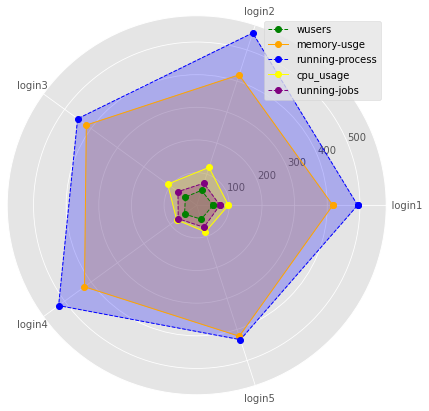

In [5]:
import matplotlib.pyplot as plt
import numpy as np
abc = pd.DataFrame(new_dict).transpose()
display(abc)

plt.style.use('ggplot')
nodes=['    login1','login2','login3','login4', 'login5']
wusers = abc['wusers'].to_list()
mem_use = abc['memory-used'].to_list()
runn_proc = abc['running-process'].to_list()
cpu_use = abc['cpu_usage %'].to_list()
runn_job = abc['running-jobs'].to_list()

angles = np.linspace(0,2*np.pi,len(nodes), endpoint=False)

angles = np.concatenate((angles,[angles[0]]))
wusers.append(wusers[0])
mem_use.append(mem_use[0])
runn_proc.append(runn_proc[0])
cpu_use.append(cpu_use[0])
runn_job.append(runn_job[0])

fig=plt.figure(figsize=(6,6))
ax=fig.add_subplot(polar=True)

ax.plot(angles,wusers, 'o--', color='g', linewidth=1, label='wusers')
ax.fill(angles,wusers, alpha=0.25, color='g')

ax.plot(angles,mem_use, 'o-', color='orange', linewidth=1, label='memory-usge')
ax.fill(angles,mem_use, alpha=0.25, color='orange')

ax.plot(angles,runn_proc, 'o--', color='b', linewidth=1, label='running-process')
ax.fill(angles,runn_proc, alpha=0.25, color='b')

ax.plot(angles,cpu_use, 'o-', color='yellow', linewidth=1, label='cpu_usage')
ax.fill(angles,cpu_use, alpha=0.25, color='yellow')

ax.plot(angles,runn_job, 'o--', color='purple', linewidth=1, label='running-jobs')
ax.fill(angles,runn_job, alpha=0.25, color='purple')

ax.set_thetagrids(np.degrees(angles[:-1]), nodes)
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()